In [34]:
library(dplyr)

In [36]:
df <- read.csv("games.csv")

In [37]:
head(df,2)

id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
TZJHLljE,FALSE,1.50421e+12,1.50421e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5 Bf4,D10,Slav Defense: Exchange Variation,5
l1NXvwaE,TRUE,1.50413e+12,1.50413e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6 Qe5+ Nxe5 c4 Bb4+,B00,Nimzowitsch Defense: Kennedy Variation,4


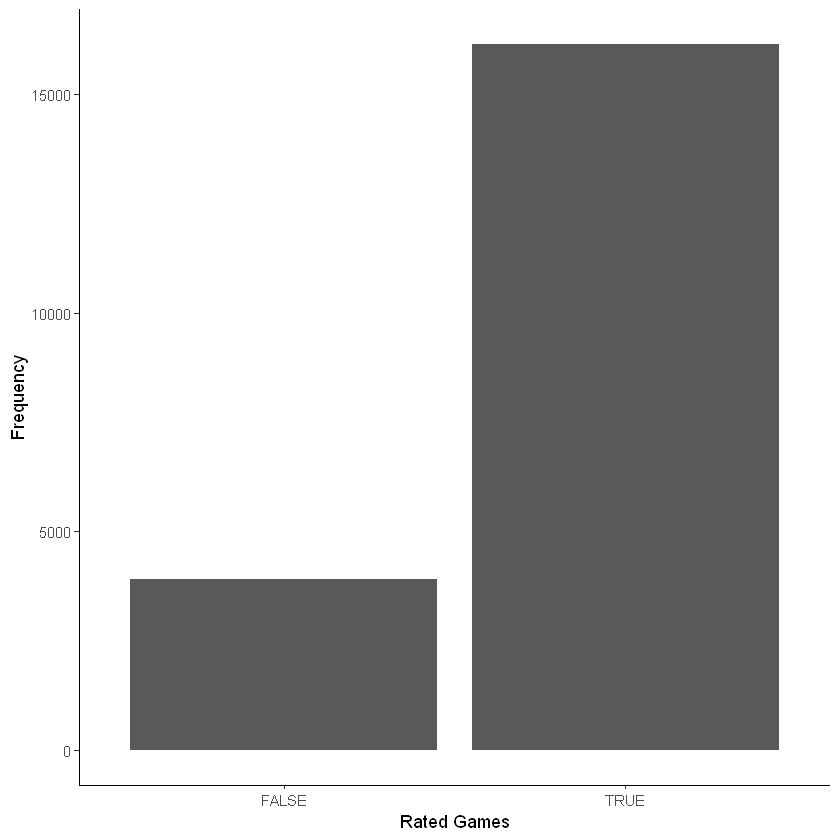

In [39]:
ggplot(df,aes(x= toupper(rated)))+ 
geom_bar()+
xlab(label = "Rated Games")+
ylab(label = "Frequency")+
theme_classic()

# Top 10 Openings

In [40]:
opening <- filter(summarise(group_by(df,opening_name),
                           count = length(opening_name)),count >200)


`summarise()` ungrouping output (override with `.groups` argument)


In [41]:
opening

opening_name,count
French Defense: Knight Variation,271
Horwitz Defense,209
Queen's Pawn Game: Chigorin Variation,229
Queen's Pawn Game: Mason Attack,232
Scandinavian Defense,223
Scandinavian Defense: Mieses-Kotroc Variation,259
Scotch Game,271
Sicilian Defense,358
Sicilian Defense: Bowdler Attack,296
Van't Kruijs Opening,368


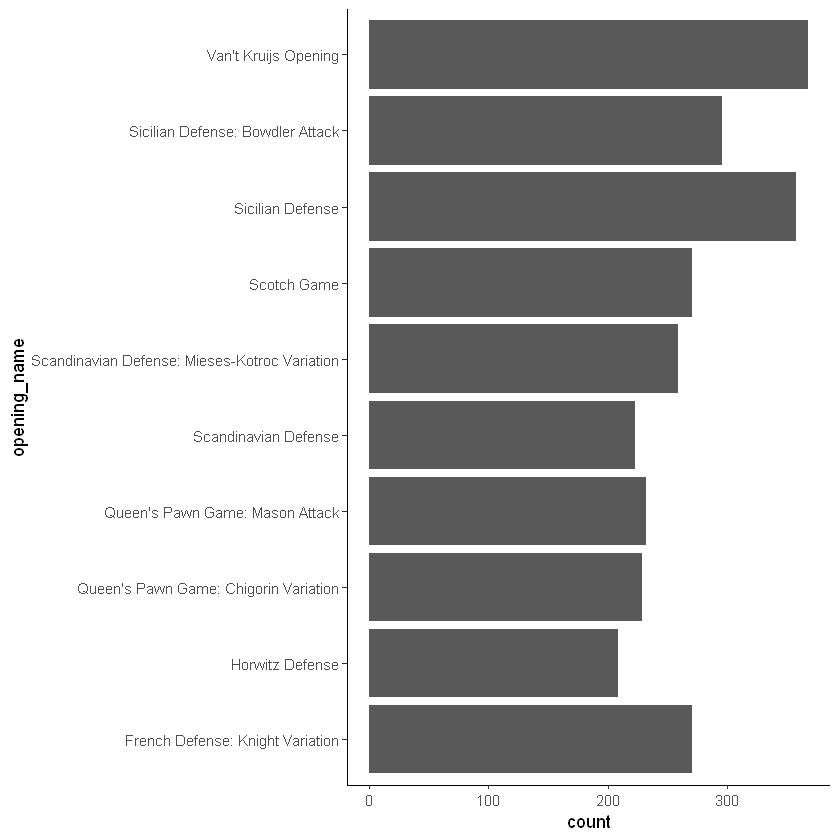

In [42]:
ggplot(opening,aes(x= opening_name,y = count))+
geom_col()+
coord_flip()+
theme_classic()

# Top 10 Opening Moves

In [44]:
open_move<-head(arrange(summarise(group_by(filter(df,winner=="white"),opening_eco),count=length(opening_eco)),desc(count)),10)
open_move

`summarise()` ungrouping output (override with `.groups` argument)


opening_eco,count
C00,417
A00,398
C41,396
B00,365
B01,358
D00,341
A40,338
C20,299
C40,266
C50,240


# Type of Wins Either Black or White

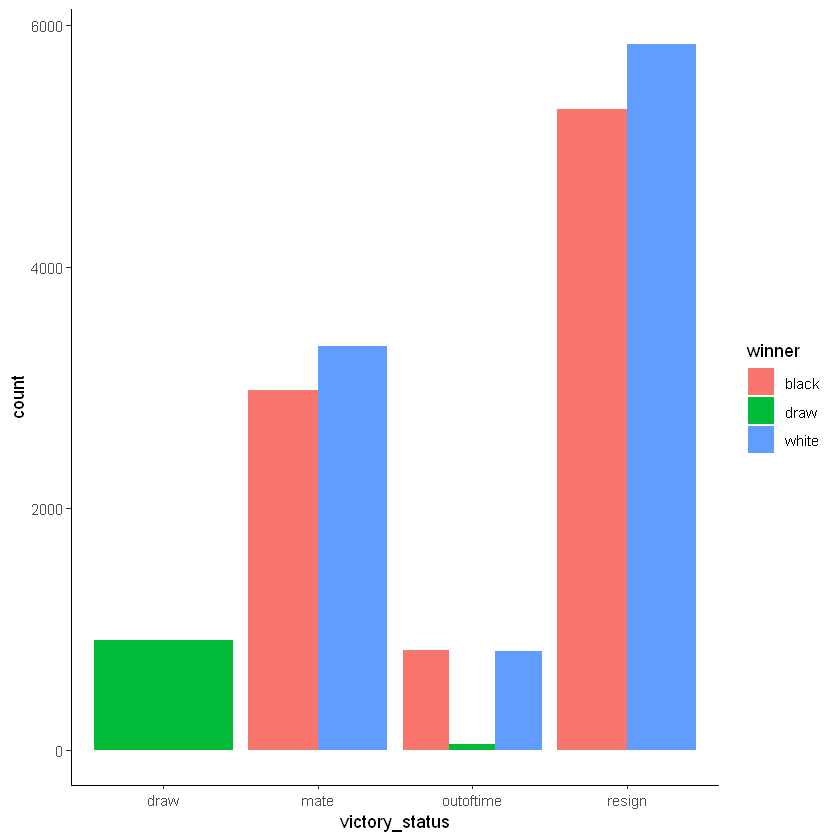

In [45]:
ggplot(df,aes(x = victory_status,fill = winner))+
geom_bar(position = "dodge")+
theme_classic()

# 10+0 is most often played

In [46]:
increment <- filter(summarise(group_by(df,increment_code),count = length(increment_code)),count>200)

`summarise()` ungrouping output (override with `.groups` argument)


In [47]:
increment

increment_code,count
10+0,7721
10+10,355
10+5,579
15+0,1311
15+10,461
15+15,850
15+5,314
20+0,448
30+0,375
5+5,738


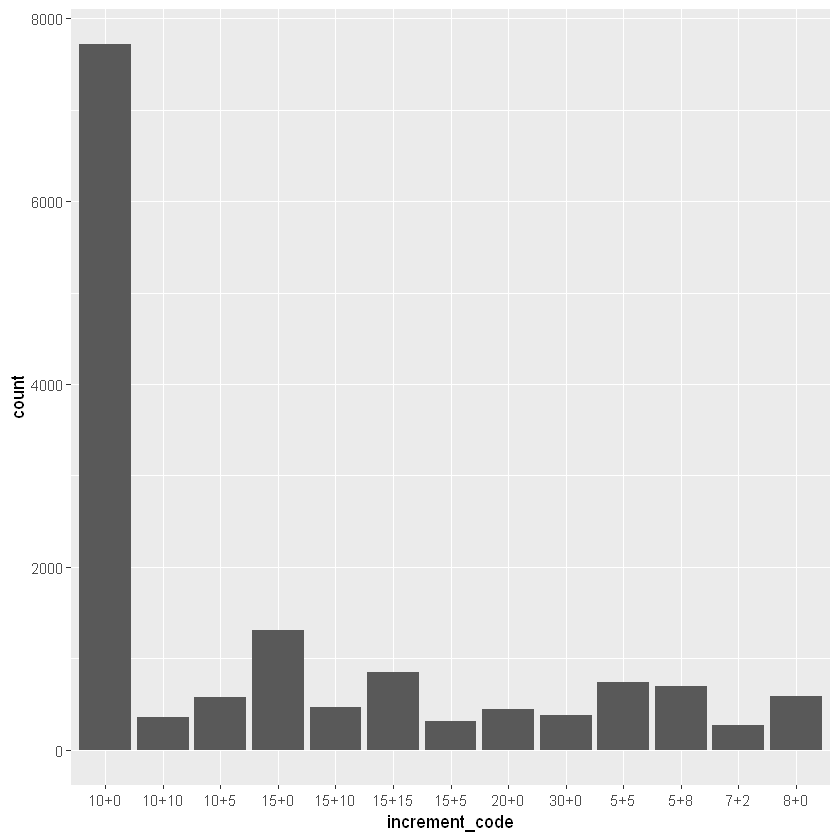

In [48]:
ggplot(increment,aes(x = increment_code,y = count))+
geom_col()

# Range of Player's Rating 

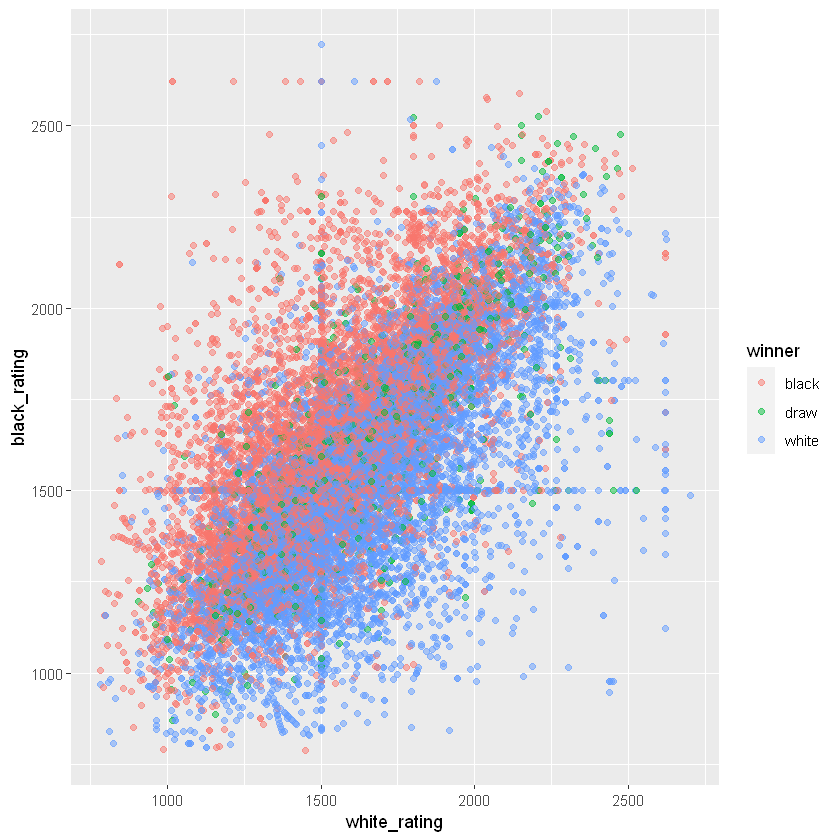

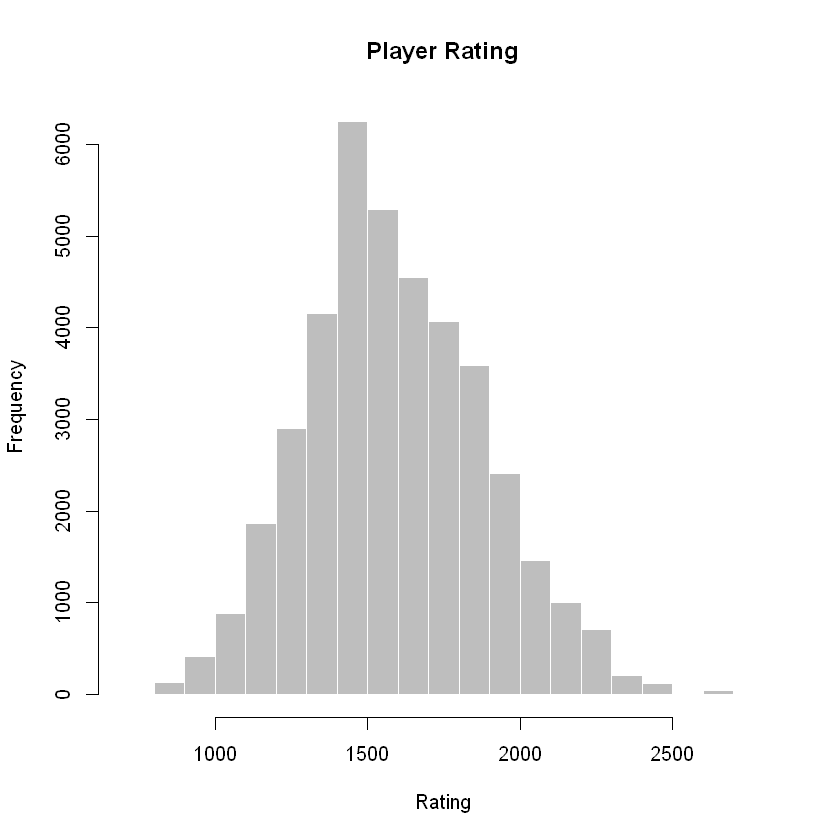

In [51]:
ggplot(df,aes(x=white_rating,y=black_rating,color=winner))+geom_point(alpha=0.5)

rating<-rbind(df$white_rating,df$black_rating)

hist(rating,angle = 45, col = "grey", border = "white", main = "Player Rating", xlab = "Rating")